# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [26]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

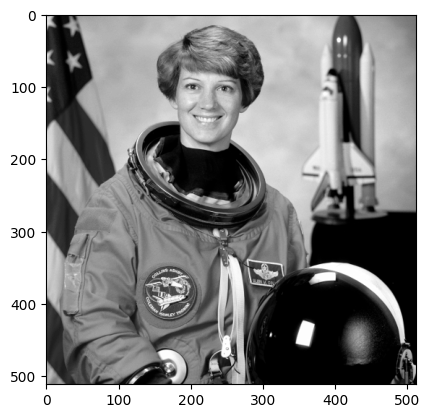

In [27]:
img = plt.imread('data/astronaut.png')
plt.imshow(img,'grey')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [28]:
def meanfilter(img_in, size): #welche größen reingegeben werden
    result = numpy.zeros(img_in.shape) #result so das wir original image nicht verändern und zurückgeben müssen 
    n = (size - 1) // 2 
    for p in numpy.ndindex(img_in.shape): #schauen wir uns alle pixel an in img_in.shape --> größe, dass numpy.ndindex gibt alle punkte an, p sind alle Koordinaten in image_shape als Liste, p geht alle Koordinaten durch
        neighborhood_sum = 0 
        if p[0] < n or p[0] >= (img_in.shape[0]-n) or p[1] < n or p[1] >= (img_in.shape[1]-n): # rand ausschließen, or wenn eins zutrifft code der f schleife abgerufen; von links zur mitte; von rechts zur miite; für reihen und spalten, wenn rand dann null
                result[p] = 0 # braucht man nicht, man kann conitnou schreiben (akztuelle Schleife), pass(mache nichts) oder reine if Struktur und Bedingung vernein
        else:
            for q in numpy.ndindex(size, size): #kleineres arry zu machen mit größe filter maske
                neighborhood_sum = neighborhood_sum + img_in[q[0] + p[0] - n, p[1] + q[1] - n] # alle pixel aufsummieren, heir auch +=
            result[p] = neighborhood_sum/(size * size)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

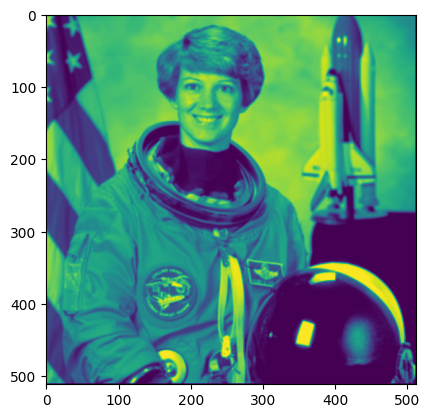

In [29]:
img3 = meanfilter(img, 3)
plt.imshow(img3)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [30]:
img1 = plt.imread('data/astronaut_meanfilter5.png')
img2 = meanfilter(img, 5)

assert numpy.allclose(img1, img2, atol=1/255) # vergleichen kein Fehler hat funktioniert

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [31]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        median_liste = []
        if p[0] < n or p[0] >= (img_in.shape[0] - n) or p[1] < n or p[1] >= (img_in.shape[1] - n):
            result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                median_liste.append(img_in[q[0] + p[0] - n, p[1] + q[1] - n])
            median_liste.sort()
            result[p] = median_liste[(size*size)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

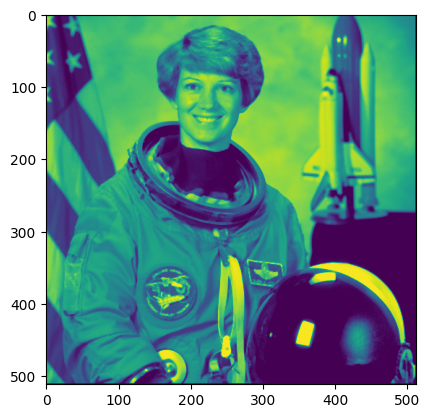

In [32]:
img4 = medianfilter(img, 3)
plt.imshow(img4)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [33]:
img3 = plt.imread('data/astronaut_medianfilter5.png')
img4 = medianfilter(img, 5)

assert numpy.allclose(img3, img4, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [34]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

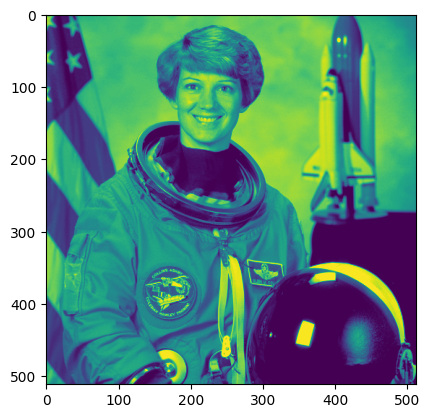

In [35]:
img5 = scipy.ndimage.uniform_filter(img, 1)
plt.imshow(img5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

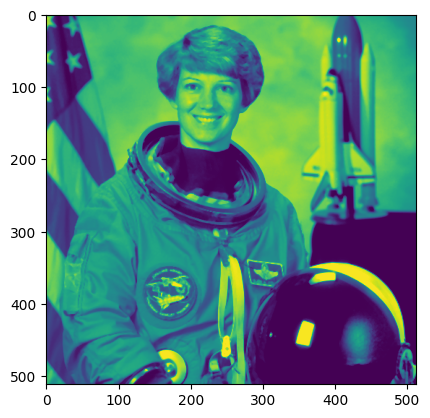

In [36]:
img6 = scipy.ndimage.median_filter(img, 3)
plt.imshow(img6)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

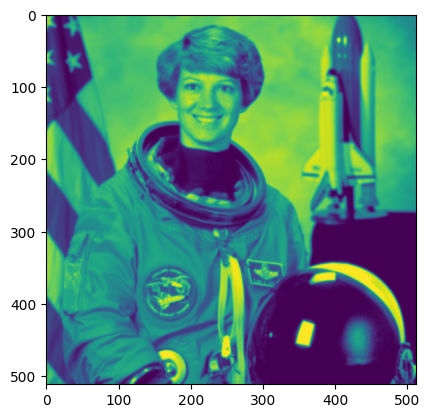

In [37]:
img7 = scipy.ndimage.gaussian_filter(img, 1)
plt.imshow(img7)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

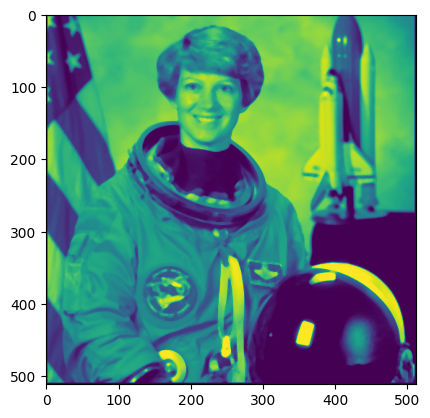

In [38]:
plt.imshow(img3)

sie haben gar kein rand unser rand ist auf null gestezt.
die preimplented sind klarer und deutlicher, die anderen etwas unscharf

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [39]:
def fastfilter(img_in, size):

    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        median_liste = []
        if p[0] < n or p[0] >= (img_in.shape[0] - n) or p[1] < n or p[1] >= (img_in.shape[1] - n):
            result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                median_liste.append(img_in[q[0] + p[0] - n, p[1] + q[1] - n])
                median_liste.sort()
            result[p] = median_liste[(size*size)//2]
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: